# **Estratificacion del dengue en el departamento del Cauca, Colombia**

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xarray as xr

plt.style.use('ggplot')


## **Datos meteorológicos**

In [2]:

df_entomologico = pd.read_csv('../data/entomologico.csv')
df_cases = pd.read_csv('../data/cases.csv')

df_meteorologico_patia = pd.read_csv('../data/meteorologicos-patia.csv')
df_meteorologico_miranda = pd.read_csv('../data/meteorologicos-miranda.csv')
df_meteorologico_piamonte = pd.read_csv('../data/meteorologicos-piamonte.csv')

def read_as_df(file_name):
    # Read file
    ds = xr.open_dataset(file_name)
    # Convert to dataframe
    df = ds.to_dataframe()

    # Unstack index (coorfinates)
    ## Get position of the coorfinates in index
    coordinates = ['lat', 'lon']
    ## For each coordinate, reset index:
    for coordinate in coordinates:
        position_index = df.index.names.index(coordinate)
        #print(position_index)
        df = df.reset_index(position_index)
    
    return df

df_humedad_relativa = read_as_df("../data/humedad-relativa.nc").reset_index()
df_precipitacion = read_as_df("../data/precipitacion.nc").reset_index()
df_temp_max = read_as_df("../data/temp-maxima.nc").reset_index()
df_temp_min = read_as_df("../data/temp-minima.nc").reset_index()

### **Limpieza de datos**

In [3]:
# data cleaning: cambio de comas por puntos en los valores numericos de las columnas

df_meteorologico_patia['Temperatura media (°C)'] = df_meteorologico_patia['Temperatura media (°C)'].str.replace(',', '.')
df_meteorologico_patia['Temperatura máxima (°C)'] = df_meteorologico_patia['Temperatura máxima (°C)'].str.replace(',', '.')
df_meteorologico_patia['Temperatura mínima (°C)'] = df_meteorologico_patia['Temperatura mínima (°C)'].str.replace(',', '.')
df_meteorologico_patia['Humedad (%)'] = df_meteorologico_patia['Humedad (%)'].str.replace(',', '.')
df_meteorologico_patia['Precipitación (mm)'] = df_meteorologico_patia['Precipitación (mm)'].str.replace(',', '.')
df_meteorologico_patia['Índice de calor (°C)'] = df_meteorologico_patia['Índice de calor (°C)'].str.replace(',', '.')
df_meteorologico_patia['Fecha'] = pd.to_datetime(df_meteorologico_piamonte['Fecha'], dayfirst=True)

df_meteorologico_piamonte['Temperatura media (°C)'] = df_meteorologico_piamonte['Temperatura media (°C)'].str.replace(',', '.')
df_meteorologico_piamonte['Temperatura máxima (°C)'] = df_meteorologico_piamonte['Temperatura máxima (°C)'].str.replace(',', '.')
df_meteorologico_piamonte['Temperatura mínima (°C)'] = df_meteorologico_piamonte['Temperatura mínima (°C)'].str.replace(',', '.')
df_meteorologico_piamonte['Humedad (%)'] = df_meteorologico_piamonte['Humedad (%)'].str.replace(',', '.')
df_meteorologico_piamonte['Precipitación (mm)'] = df_meteorologico_piamonte['Precipitación (mm)'].str.replace(',', '.')
df_meteorologico_piamonte['Índice de calor (°C)'] = df_meteorologico_piamonte['Índice de calor (°C)'].str.replace(',', '.')
df_meteorologico_piamonte['Fecha'] = pd.to_datetime(df_meteorologico_piamonte['Fecha'], dayfirst=True)

df_meteorologico_miranda['Temperatura media (°C)'] = df_meteorologico_miranda['Temperatura media (°C)'].str.replace(',', '.')
df_meteorologico_miranda['Temperatura máxima (°C)'] = df_meteorologico_miranda['Temperatura máxima (°C)'].str.replace(',', '.')
df_meteorologico_miranda['Temperatura mínima (°C)'] = df_meteorologico_miranda['Temperatura mínima (°C)'].str.replace(',', '.')
df_meteorologico_miranda['Humedad (%)'] = df_meteorologico_miranda['Humedad (%)'].str.replace(',', '.')
df_meteorologico_miranda['Precipitación (mm)'] = df_meteorologico_miranda['Precipitación (mm)'].str.replace(',', '.')
df_meteorologico_miranda['Índice de calor (°C)'] = df_meteorologico_miranda['Índice de calor (°C)'].str.replace(',', '.')
df_meteorologico_miranda['Fecha'] = pd.to_datetime(df_meteorologico_miranda['Fecha'], format='mixed')

In [4]:

df_meteorologico_patia.dropna(subset=['Fecha'], inplace=True)
df_meteorologico_patia = df_meteorologico_patia.sort_values(by=['Fecha'], ascending=True)
df_meteorologico_patia['Temperatura media (°C)'] = df_meteorologico_patia['Temperatura media (°C)'].astype(float)
df_meteorologico_patia['Temperatura máxima (°C)'] = df_meteorologico_patia['Temperatura máxima (°C)'].astype(float)
df_meteorologico_patia['Temperatura mínima (°C)'] = df_meteorologico_patia['Temperatura mínima (°C)'].astype(float)
df_meteorologico_patia['Humedad (%)'] = df_meteorologico_patia['Humedad (%)'].astype(float)
df_meteorologico_patia['Precipitación (mm)'] = df_meteorologico_patia['Precipitación (mm)'].astype(float)
df_meteorologico_patia['Índice de calor (°C)'] = df_meteorologico_patia['Índice de calor (°C)'].astype(float)

df_meteorologico_piamonte.dropna(subset=['Fecha'], inplace=True)
df_meteorologico_piamonte = df_meteorologico_piamonte.sort_values(by=['Fecha'], ascending=True)
df_meteorologico_piamonte['Temperatura media (°C)'] = df_meteorologico_piamonte['Temperatura media (°C)'].astype(float)
df_meteorologico_piamonte['Temperatura máxima (°C)'] = df_meteorologico_piamonte['Temperatura máxima (°C)'].astype(float)
df_meteorologico_piamonte['Temperatura mínima (°C)'] = df_meteorologico_piamonte['Temperatura mínima (°C)'].astype(float)
df_meteorologico_piamonte['Humedad (%)'] = df_meteorologico_piamonte['Humedad (%)'].astype(float)
df_meteorologico_piamonte['Precipitación (mm)'] = df_meteorologico_piamonte['Precipitación (mm)'].astype(float)
df_meteorologico_piamonte['Índice de calor (°C)'] = df_meteorologico_piamonte['Índice de calor (°C)'].astype(float)

df_meteorologico_miranda.dropna(subset=['Fecha'], inplace=True)
df_meteorologico_miranda = df_meteorologico_miranda.sort_values(by=['Fecha'], ascending=True)
df_meteorologico_miranda['Temperatura media (°C)'] = df_meteorologico_miranda['Temperatura media (°C)'].astype(float)
df_meteorologico_miranda['Temperatura máxima (°C)'] = df_meteorologico_miranda['Temperatura máxima (°C)'].astype(float)
df_meteorologico_miranda['Temperatura mínima (°C)'] = df_meteorologico_miranda['Temperatura mínima (°C)'].astype(float)
df_meteorologico_miranda['Humedad (%)'] = df_meteorologico_miranda['Humedad (%)'].astype(float)
df_meteorologico_miranda['Precipitación (mm)'] = df_meteorologico_miranda['Precipitación (mm)'].astype(float)
df_meteorologico_miranda['Índice de calor (°C)'] = df_meteorologico_miranda['Índice de calor (°C)'].astype(float)

### **Agrupacion de datos por mes**

In [5]:

df_meteorologico_patia_grouped = df_meteorologico_patia.groupby(df_meteorologico_patia['Fecha'].dt.month).agg({
    'Temperatura media (°C)': 'mean',
    'Temperatura máxima (°C)': 'max',
    'Temperatura mínima (°C)': 'min',
    'Humedad (%)': 'mean',
    'Precipitación (mm)': 'mean',
    'Índice de calor (°C)': 'mean'
}).reset_index()

df_meteorologico_piamonte_grouped = df_meteorologico_piamonte.groupby(df_meteorologico_patia['Fecha'].dt.month).agg({
    'Temperatura media (°C)': 'mean',
    'Temperatura máxima (°C)': 'max',
    'Temperatura mínima (°C)': 'min',
    'Humedad (%)': 'mean',
    'Precipitación (mm)': 'mean',
    'Índice de calor (°C)': 'mean'
}).reset_index()

df_meteorologico_miranda_grouped = df_meteorologico_miranda.groupby(df_meteorologico_patia['Fecha'].dt.month).agg({
    'Temperatura media (°C)': 'mean',
    'Temperatura máxima (°C)': 'max',
    'Temperatura mínima (°C)': 'min',
    'Humedad (%)': 'mean',
    'Precipitación (mm)': 'mean',
    'Índice de calor (°C)': 'mean'
}).reset_index()

meses = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',    
    12: 'Diciembre'
}

df_meteorologico_patia_grouped['Fecha'] = df_meteorologico_patia_grouped['Fecha'].map(meses)
df_meteorologico_piamonte_grouped['Fecha'] = df_meteorologico_piamonte_grouped['Fecha'].map(meses)
df_meteorologico_miranda_grouped['Fecha'] = df_meteorologico_miranda_grouped['Fecha'].map(meses)

### **Visualizacion de los datos meteorologicos**

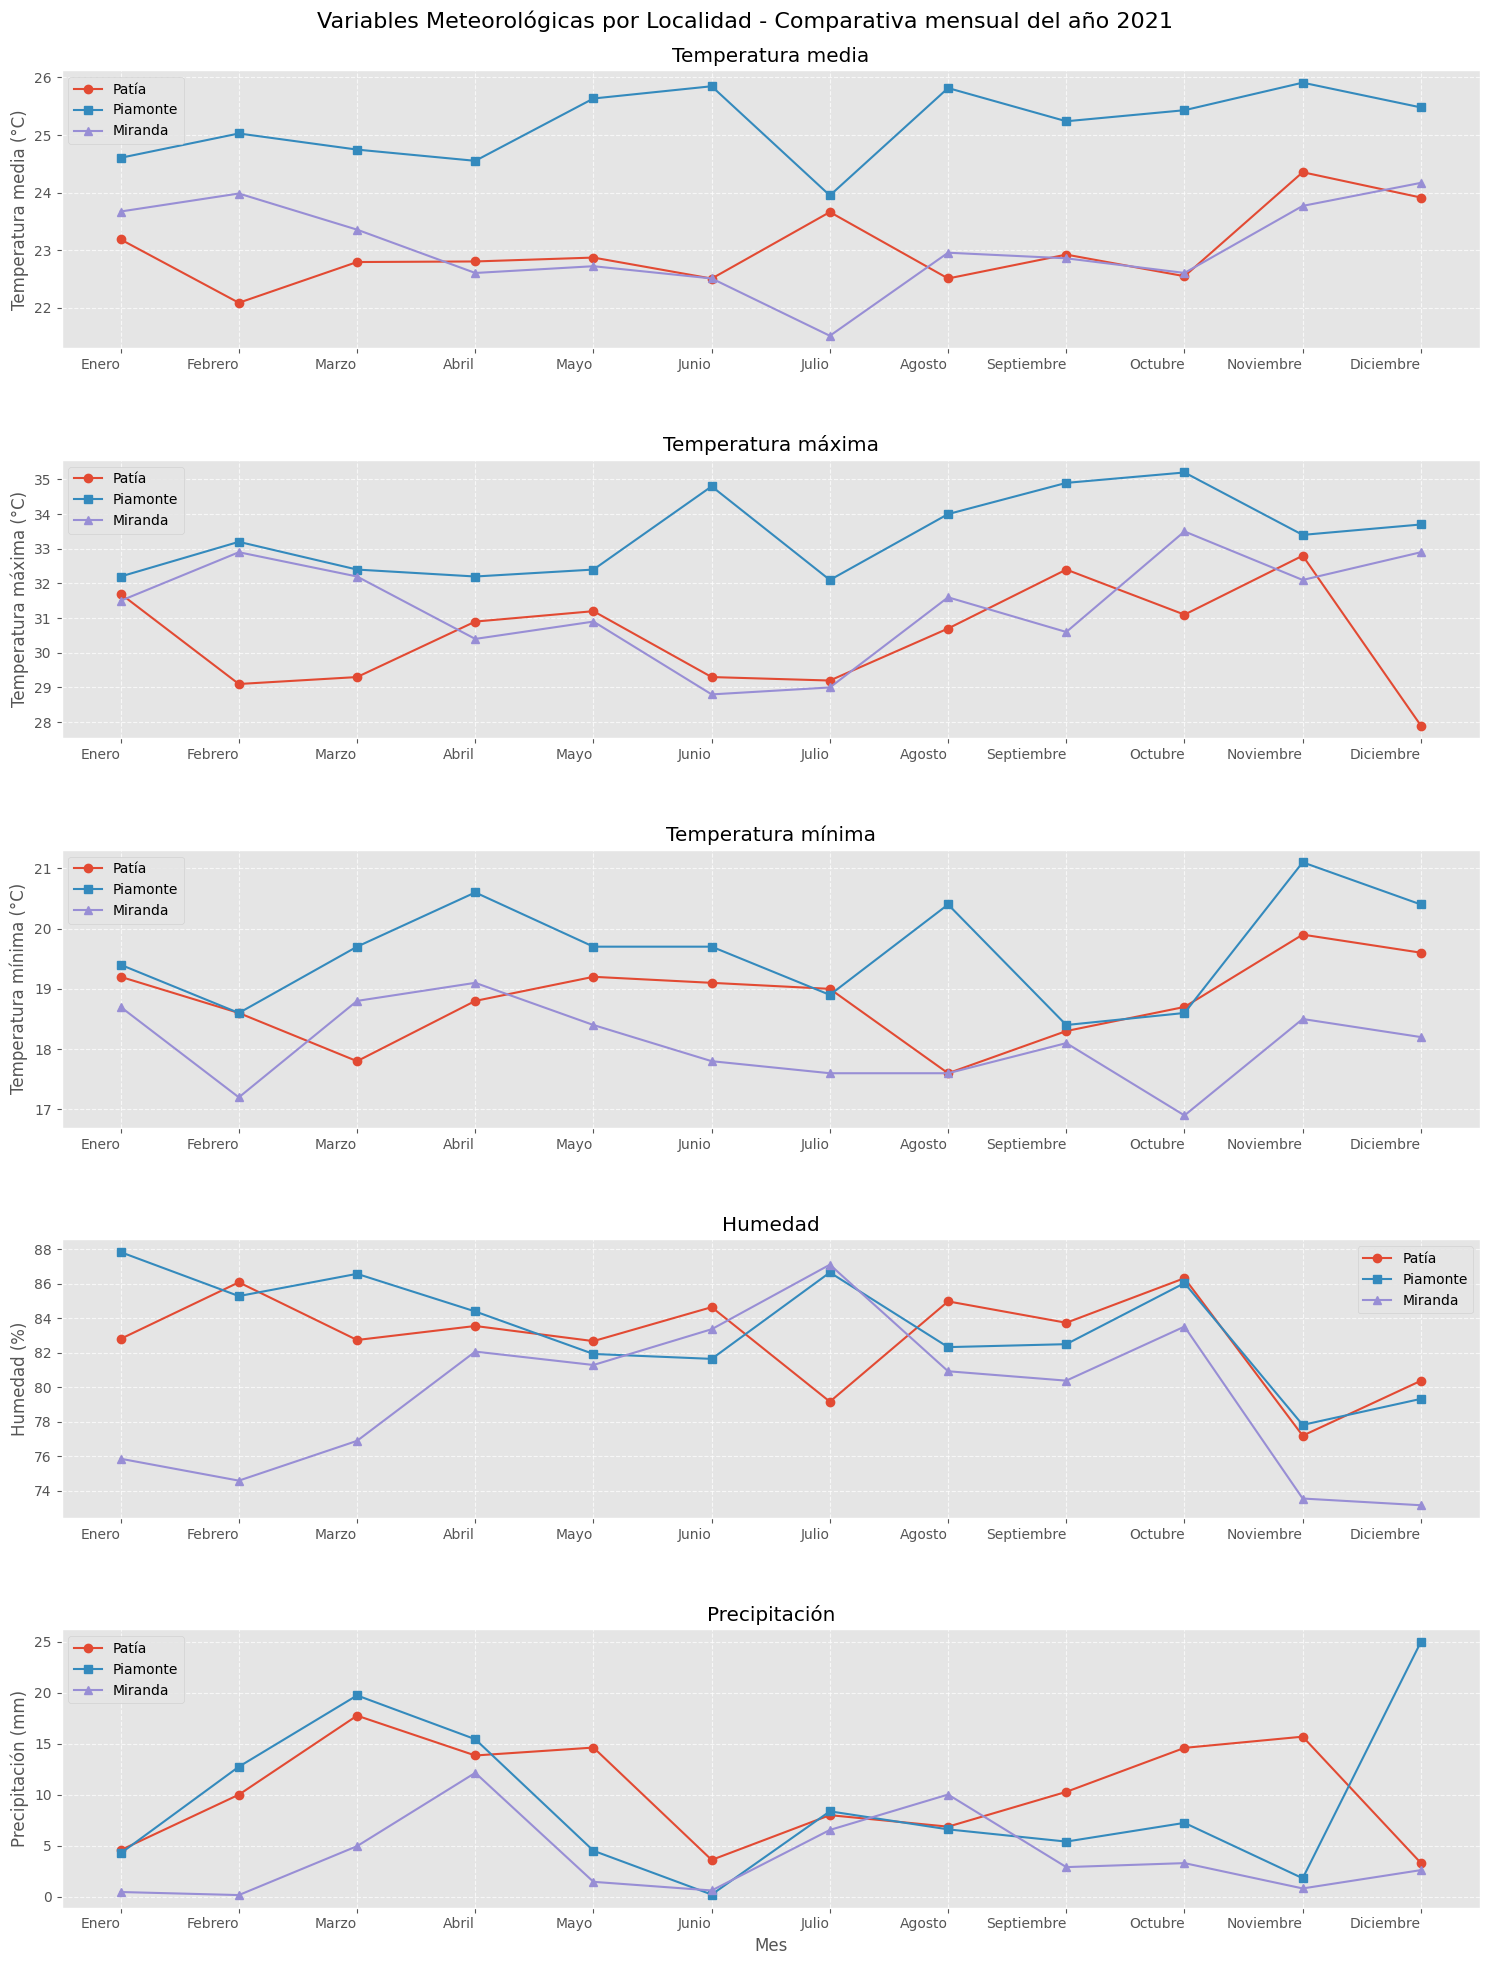

In [6]:
# Create a figure with subplots for each meteorological variable
fig, axs = plt.subplots(5, 1, figsize=(15, 20), sharex=False)

# Common x-axis for all the months to ensure proper ordering
x_order = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# 1. Temperature media
axs[0].plot(df_meteorologico_patia_grouped['Fecha'], df_meteorologico_patia_grouped['Temperatura media (°C)'], marker='o', label='Patía')
axs[0].plot(df_meteorologico_piamonte_grouped['Fecha'], df_meteorologico_piamonte_grouped['Temperatura media (°C)'], marker='s', label='Piamonte')
axs[0].plot(df_meteorologico_miranda_grouped['Fecha'], df_meteorologico_miranda_grouped['Temperatura media (°C)'], marker='^', label='Miranda')
axs[0].set_ylabel('Temperatura media (°C)')
axs[0].set_title('Temperatura media')
axs[0].grid(True, linestyle='--', alpha=0.7)
axs[0].legend()
axs[0].set_xticks(range(len(x_order)))
axs[0].set_xticklabels(x_order, rotation=0, ha='right')
axs[0].set_xlim(-0.5, len(x_order) - 0.5)

# 2. Temperature maxima
axs[1].plot(df_meteorologico_patia_grouped['Fecha'], df_meteorologico_patia_grouped['Temperatura máxima (°C)'], marker='o', label='Patía')
axs[1].plot(df_meteorologico_piamonte_grouped['Fecha'], df_meteorologico_piamonte_grouped['Temperatura máxima (°C)'], marker='s', label='Piamonte')
axs[1].plot(df_meteorologico_miranda_grouped['Fecha'], df_meteorologico_miranda_grouped['Temperatura máxima (°C)'], marker='^', label='Miranda')
axs[1].set_ylabel('Temperatura máxima (°C)')
axs[1].set_title('Temperatura máxima')
axs[1].grid(True, linestyle='--', alpha=0.7)
axs[1].legend()
axs[1].set_xticks(range(len(x_order)))
axs[1].set_xticklabels(x_order, rotation=0, ha='right')
axs[1].set_xlim(-0.5, len(x_order) - 0.5)

# 3. Temperature minima
axs[2].plot(df_meteorologico_patia_grouped['Fecha'], df_meteorologico_patia_grouped['Temperatura mínima (°C)'], marker='o', label='Patía')
axs[2].plot(df_meteorologico_piamonte_grouped['Fecha'], df_meteorologico_piamonte_grouped['Temperatura mínima (°C)'], marker='s', label='Piamonte')
axs[2].plot(df_meteorologico_miranda_grouped['Fecha'], df_meteorologico_miranda_grouped['Temperatura mínima (°C)'], marker='^', label='Miranda')
axs[2].set_ylabel('Temperatura mínima (°C)')
axs[2].set_title('Temperatura mínima')
axs[2].grid(True, linestyle='--', alpha=0.7)
axs[2].legend()
axs[2].set_xticks(range(len(x_order)))
axs[2].set_xticklabels(x_order, rotation=0, ha='right')
axs[2].set_xlim(-0.5, len(x_order) - 0.5)

# 4. Humedad
axs[3].plot(df_meteorologico_patia_grouped['Fecha'], df_meteorologico_patia_grouped['Humedad (%)'], marker='o', label='Patía')
axs[3].plot(df_meteorologico_piamonte_grouped['Fecha'], df_meteorologico_piamonte_grouped['Humedad (%)'], marker='s', label='Piamonte')
axs[3].plot(df_meteorologico_miranda_grouped['Fecha'], df_meteorologico_miranda_grouped['Humedad (%)'], marker='^', label='Miranda')
axs[3].set_ylabel('Humedad (%)')
axs[3].set_title('Humedad')
axs[3].grid(True, linestyle='--', alpha=0.7)
axs[3].legend()
axs[3].set_xticks(range(len(x_order)))
axs[3].set_xticklabels(x_order, rotation=0, ha='right')
axs[3].set_xlim(-0.5, len(x_order) - 0.5)

# 5. Precipitación
axs[4].plot(df_meteorologico_patia_grouped['Fecha'], df_meteorologico_patia_grouped['Precipitación (mm)'], marker='o', label='Patía')
axs[4].plot(df_meteorologico_piamonte_grouped['Fecha'], df_meteorologico_piamonte_grouped['Precipitación (mm)'], marker='s', label='Piamonte')
axs[4].plot(df_meteorologico_miranda_grouped['Fecha'], df_meteorologico_miranda_grouped['Precipitación (mm)'], marker='^', label='Miranda')
axs[4].set_ylabel('Precipitación (mm)')
axs[4].set_xlabel('Mes')
axs[4].set_title('Precipitación')
axs[4].grid(True, linestyle='--', alpha=0.7)
axs[4].legend()
axs[4].set_xticks(range(len(x_order)))
axs[4].set_xticklabels(x_order, rotation=0, ha='right')
axs[4].set_xlim(-0.5, len(x_order) - 0.5)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95, hspace=0.4)  # Increased spacing between subplots

# Add an overall title
fig.suptitle('Variables Meteorológicas por Localidad - Comparativa mensual del año 2021', fontsize=16, y=0.98)

plt.show()


## **Datos entomológicos: Diversidad de especies de mosquitos**

In [7]:
df_entomologico['locality'] = df_entomologico['locality'].str.replace(
    r'^Casa ubicada en el barrio (.+) de (.+)$', r'\1 (\2)',
    regex=True
)

df_entomologico['locality'] = df_entomologico['locality'].str.extract(r'^([^(]+)', expand=False).str.strip()
df_entomologico.rename(columns={'locality': 'Barrio'}, inplace=True)
df_entomologico.rename(columns={'county': 'Municipio'}, inplace=True)

df_entomologico['id'] = df_entomologico['id'].str.replace('INS:ProyectoDengue67217:', '', regex=False)

df_entomologico.drop(columns=['organismRemarks', 'eventID','verbatimElevation','higherClassification','genus','subgenus','specificEpithet','vernacularName','eventDate','locationID'], inplace=True)


In [8]:
# split sex column into two columns

# Extract male and female counts from the sex column using regex
df_entomologico['Machos'] = df_entomologico['sex'].str.extract(r'(\d+)\s*[Mm]achos?').fillna(0).astype(int)
df_entomologico['Hembras'] = df_entomologico['sex'].str.extract(r'(\d+)\s*[Hh]embras?').fillna(0).astype(int)

# Verify that rows with just 'Macho' or 'Hembra' (without numbers) are properly handled
macho_only_mask = df_entomologico['sex'].str.match(r'^[Mm]acho$', na=False)
hembra_only_mask = df_entomologico['sex'].str.match(r'^[Hh]embra$', na=False)

df_entomologico.loc[macho_only_mask, 'Machos'] = 1
df_entomologico.loc[hembra_only_mask, 'Hembras'] = 1

df_entomologico.drop(columns=['sex'], inplace=True)

In [9]:
df_entomologico

,id,individualCount,Municipio,Barrio,decimalLatitude,decimalLongitude,scientificName,Machos,Hembras
0,Aed-001,5,Patía,Puerto Nuevo,2.128902,-76.973042,Aedes aegypti,2,3
1,Aed-002,1,Patía,Puerto Nuevo,2.129389,-76.972715,Aedes aegypti,0,1
2,Aed-003,2,Patía,Puerto Nuevo,2.129656,-76.973285,Aedes aegypti,1,1
3,Culx-001,6,Patía,Puerto Nuevo,2.129656,-76.973285,Culex quinquefasciatus,3,3
4,Culx-002,2,Patía,Puerto Nuevo,2.129929,-76.973326,Culex quinquefasciatus,0,2
...,...,...,...,...,...,...,...,...,...
524,Aed-247,8,Miranda,San Antonio,3.248931,-76.231789,Aedes aegypti,4,4
525,Aed-248,1,Miranda,San Antonio,3.248946,-76.231773,Aedes aegypti,1,0
526,Aed-249,20,Miranda,San Antonio,3.248814,-76.231665,Aedes aegypti,15,5
527,Culx-279,1,Miranda,San Antonio,3.248814,-76.231665,Culex quinquefasciatus,0,1


### **Cantidad de ejemplares por especie**

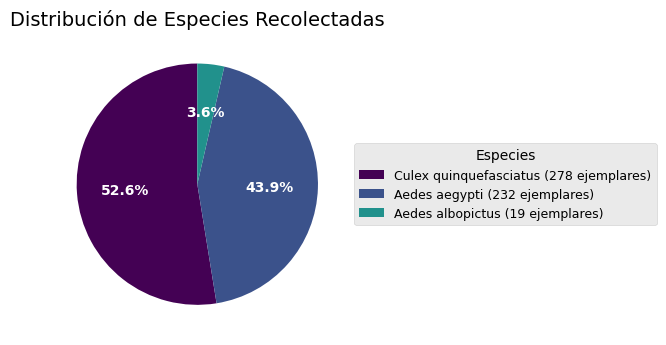

In [10]:
sc = df_entomologico['scientificName'].value_counts()

# Create a smaller figure and axis
fig, ax = plt.subplots(figsize=(6, 5))

# Define colors
colors = plt.cm.viridis(np.linspace(0, 0.50, len(sc)))

# Create pie chart with white percentage text
wedges, texts, autotexts = ax.pie(
    sc.values, 
    labels=None,
    autopct='%1.1f%%',
    colors=colors,
    textprops={'fontsize': 10, 'weight': 'bold', 'color': 'white'},  # Added white color
    startangle=90
)

# Create a legend with species names and counts
legend_labels = [f"{name} ({count} ejemplares)" for name, count in zip(sc.index, sc.values)]
ax.legend(wedges, legend_labels, title="Especies", loc="center left", 
          bbox_to_anchor=(1, 0, 0.5, 1), fontsize=9)

plt.title('Distribución de Especies Recolectadas', fontsize=14)
plt.tight_layout()
plt.show()

# Display table with percentages
sc_percent = pd.DataFrame({
    'Cantidad': sc.values,
    'Porcentaje': np.round((sc.values / sc.values.sum()) * 100, 2)
}, index=sc.index).sort_values('Cantidad', ascending=False).reset_index()

In [11]:
import re

# Create the base location_diversity with summary statistics
location_diversity = df_entomologico.groupby(['Barrio', 'Municipio']).agg({
    'individualCount': 'count',
    'scientificName': pd.Series.nunique
}).reset_index().rename(columns={
    'individualCount': 'Total de individuos',
    'scientificName': 'Especies únicas',
})

# Create a pivot table with counts for each species at each location
species_pivot = df_entomologico.pivot_table(
    index=['Barrio', 'Municipio'],
    columns='scientificName', 
    values='individualCount', 
    aggfunc='count',
    fill_value=0
)

# Reset index to prepare for merge
species_pivot = species_pivot.reset_index()

# Merge the two DataFrames
location_diversity = location_diversity.merge(species_pivot, on=['Barrio', 'Municipio'])

location_diversity = location_diversity.sort_values('Total de individuos', ascending=False)

location_diversity_patia = location_diversity[location_diversity['Municipio'] == 'Patía']
location_diversity_piamonte = location_diversity[location_diversity['Municipio'] == 'Piamonte']
location_diversity_miranda = location_diversity[location_diversity['Municipio'] == 'Miranda']

location_diversity_patia = location_diversity_patia.drop(['Especies únicas'], axis=1)
location_diversity_piamonte = location_diversity_piamonte.drop(['Especies únicas'], axis=1)
location_diversity_miranda = location_diversity_miranda.drop(['Especies únicas'], axis=1)

location_diversity = location_diversity.drop(['Especies únicas'], axis=1)

location_diversity

,Barrio,Municipio,Total de individuos,Aedes aegypti,Aedes albopictus,Culex quinquefasciatus
10,Olaya Herrera,Patía,94,45,6,43
16,Villa los Prados,Piamonte,49,7,4,38
5,Fundadores,Piamonte,48,11,0,37
8,La Paz,Piamonte,44,10,1,33
15,San Antonio,Miranda,41,25,1,15
12,Porvenir,Miranda,36,20,0,16
7,La Cabaña,Miranda,32,26,0,6
13,Postobón,Patía,28,4,2,22
11,Popular,Patía,26,10,0,16
9,Libertador,Patía,22,7,1,14


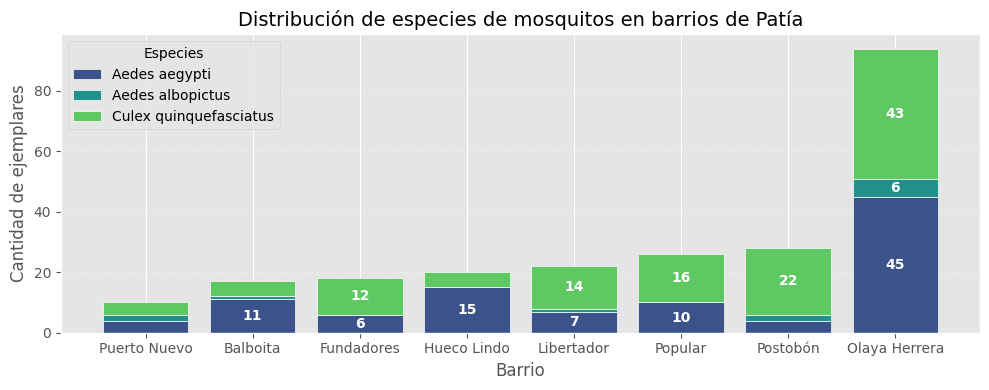

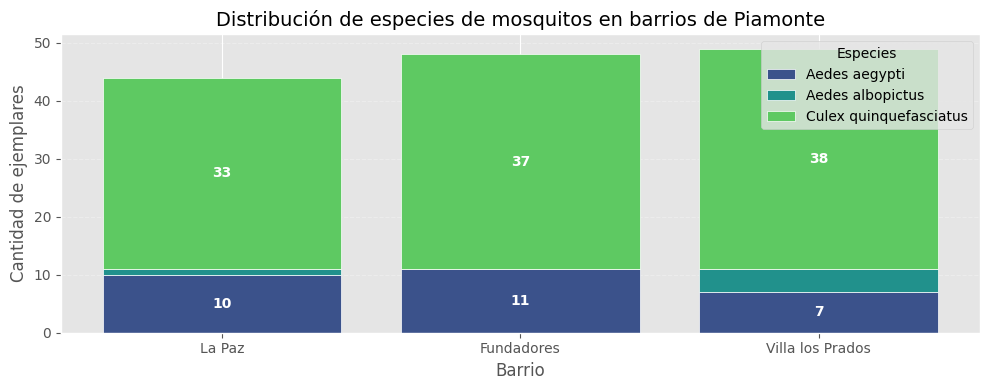

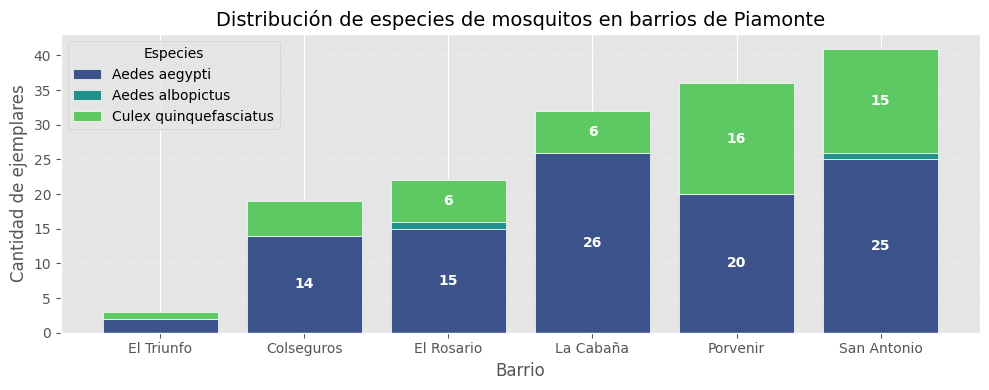

In [12]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Sort the data by total number of individuals
location_diversity_patia_sorted = location_diversity_patia.sort_values('Total de individuos', ascending=True)

# Set up the figure with better dimensions for vertical bar chart
plt.figure(figsize=(10, 4))

# Get the species columns (excluding the metadata columns)
species_cols = ['Aedes aegypti', 'Aedes albopictus', 'Culex quinquefasciatus']

# Create a color palette for the species
species_colors = sns.color_palette('viridis', len(species_cols))

# Create the stacked vertical bar chart
bottom = np.zeros(len(location_diversity_patia_sorted))

for i, species in enumerate(species_cols):
    counts = location_diversity_patia_sorted[species].values
    barrios = location_diversity_patia_sorted['Barrio'].values
    
    bars = plt.bar(barrios, counts, bottom=bottom, color=species_colors[i], 
                  label=species, edgecolor='white', linewidth=0.5)
    bottom += counts
    
    # Add count labels on top of the bars
    for j, (count, b) in enumerate(zip(counts, bottom - counts/2)):
        if count > 5:  # Only show label if the count is significant
            plt.text(j, bottom[j] - counts[j]/2, str(int(count)), 
                ha='center', va='center', color='white', fontweight='bold')

# Enhance the chart with proper styling
plt.title('Distribución de especies de mosquitos en barrios de Patía', fontsize=14)
plt.ylabel('Cantidad de ejemplares', fontsize=12)
plt.xlabel('Barrio', fontsize=12)
plt.legend(title='Especies')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Ensure there's no clipping
plt.tight_layout()
plt.show()


# Sort the data by total number of individuals
location_diversity_piamonte_sorted = location_diversity_piamonte.sort_values('Total de individuos', ascending=True)

# Set up the figure with better dimensions for vertical bar chart
plt.figure(figsize=(10, 4))

# Create a color palette for the species
species_colors = sns.color_palette('viridis', len(species_cols))

# Create the stacked vertical bar chart
bottom = np.zeros(len(location_diversity_piamonte_sorted))

for i, species in enumerate(species_cols):
    counts = location_diversity_piamonte_sorted[species].values
    barrios = location_diversity_piamonte_sorted['Barrio'].values
    
    bars = plt.bar(barrios, counts, bottom=bottom, color=species_colors[i], 
        label=species, edgecolor='white', linewidth=0.5)
    bottom += counts
    
    # Add count labels on top of the bars
    for j, (count, b) in enumerate(zip(counts, bottom - counts/2)):
        if count > 5:  # Only show label if the count is significant
            plt.text(j, bottom[j] - counts[j]/2, str(int(count)), 
                ha='center', va='center', color='white', fontweight='bold')

# Enhance the chart with proper styling
plt.title('Distribución de especies de mosquitos en barrios de Piamonte', fontsize=14)
plt.ylabel('Cantidad de ejemplares', fontsize=12)
plt.xlabel('Barrio', fontsize=12)
plt.legend(title='Especies')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Ensure there's no clipping
plt.tight_layout()
plt.show()

# Sort the data by total number of individuals
location_diversity_miranda_sorted = location_diversity_miranda.sort_values('Total de individuos', ascending=True)

# Set up the figure with better dimensions for vertical bar chart
plt.figure(figsize=(10, 4))

# Create a color palette for the species
species_colors = sns.color_palette('viridis', len(species_cols))

# Create the stacked vertical bar chart
bottom = np.zeros(len(location_diversity_miranda_sorted))

for i, species in enumerate(species_cols):
    counts = location_diversity_miranda_sorted[species].values
    barrios = location_diversity_miranda_sorted['Barrio'].values
    
    bars = plt.bar(barrios, counts, bottom=bottom, color=species_colors[i], 
        label=species, edgecolor='white', linewidth=0.5)
    bottom += counts
    
    # Add count labels on top of the bars
    for j, (count, b) in enumerate(zip(counts, bottom - counts/2)):
        if count > 5:  # Only show label if the count is significant
            plt.text(j, bottom[j] - counts[j]/2, str(int(count)), 
                ha='center', va='center', color='white', fontweight='bold')

# Enhance the chart with proper styling
plt.title('Distribución de especies de mosquitos en barrios de Piamonte', fontsize=14)
plt.ylabel('Cantidad de ejemplares', fontsize=12)
plt.xlabel('Barrio', fontsize=12)
plt.legend(title='Especies')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Ensure there's no clipping
plt.tight_layout()
plt.show()

In [13]:
df_cases = df_cases.drop(columns=['OBJECTID', 'Loc_name', 'Match_addr', 'Pertenencia etnica', 'fec_consulta', 'ini_sintomas', 'locationID', 'Ocupación '])

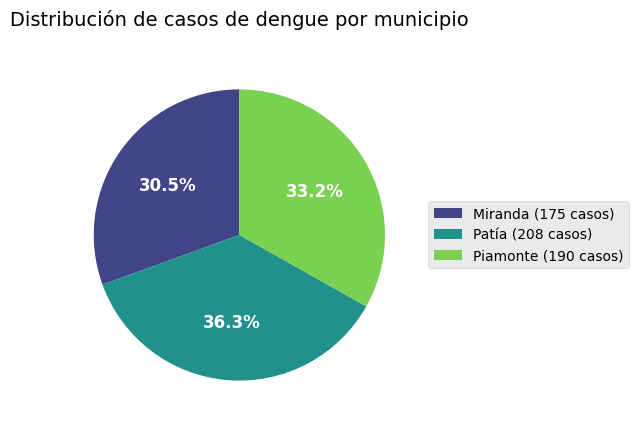

In [14]:
df_cases.rename(columns={'county': 'Barrio'}, inplace=True)

# Create a new column that represents the primary key of this dataframe
df_cases['id'] = df_cases.index

# Group data by municipality and count cases
casos_dengue_municipio = df_cases.groupby('Barrio').agg({
    'id': 'count',
}).reset_index().rename(columns={'id': 'Casos'})

# Create a pie chart
plt.figure(figsize=(6, 6))

# Define a pleasing color palette
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(casos_dengue_municipio)))

# Create pie chart with percentages
wedges, texts, autotexts = plt.pie(
    casos_dengue_municipio['Casos'], 
    labels=None,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    shadow=False,
    textprops={'fontsize': 12, 'weight': 'bold', 'color': 'white'}
)

# Add legend with municipality names and case counts
legend_labels = [f"{mun} ({cases} casos)" for mun, cases in 
    zip(casos_dengue_municipio['Barrio'], casos_dengue_municipio['Casos'])]
plt.legend(wedges, legend_labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)

# Add title with better styling
plt.title('Distribución de casos de dengue por municipio', fontsize=14, pad=20)

# Adjust layout to make room for the legend
plt.tight_layout()
plt.show()



In [15]:
# funciones auxiliares para graficar variables geográficas

import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from scipy.interpolate import griddata
import numpy as np

def group_by_coordinates(df, value_column, sort_ascending=False):
    return df.groupby(['lon', 'lat']).agg({
        value_column: 'mean'
    }).reset_index().sort_values(value_column, ascending=sort_ascending)
    
def plot_geographic_variables_continuous(dataframes, value_columns, titles, cmaps=None):
    if cmaps is None:
        cmaps = ['coolwarm'] * len(dataframes)
    
    # Create figure with subplots
    fig, axes = plt.subplots(1, len(dataframes), figsize=(8, 5))
    
    if len(dataframes) == 1:
        axes = [axes]
    
    for i, (df, value_column, title, cmap) in enumerate(zip(dataframes, value_columns, titles, cmaps)):
        # Extract lat, lon, and the value column
        lon = df['lon'].values
        lat = df['lat'].values
        values = df[value_column].values
        
        # Create a grid for interpolation
        grid_lon = np.linspace(lon.min(), lon.max(), 200)
        grid_lat = np.linspace(lat.min(), lat.max(), 200)
        grid_lon, grid_lat = np.meshgrid(grid_lon, grid_lat)
        
        # Interpolate values onto the grid
        grid_values = griddata((lon, lat), values, (grid_lon, grid_lat), method='cubic')
        
        # Create plot
        im = axes[i].pcolormesh(grid_lon, grid_lat, grid_values, cmap=cmap, shading='auto')
        
        # Add colorbar
        cbar = fig.colorbar(im, ax=axes[i], orientation="horizontal")
        cbar.set_label(f"Average {value_column.replace('_', ' ').title()}")
        
        axes[i].set_title(title)
        axes[i].set_xlabel('Longitud')
        axes[i].set_ylabel('Latitud')
    
    plt.tight_layout()
    return fig, axes

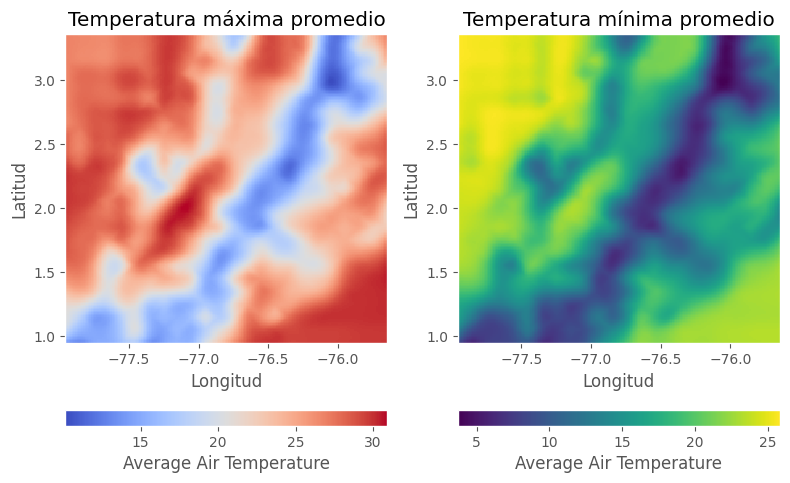

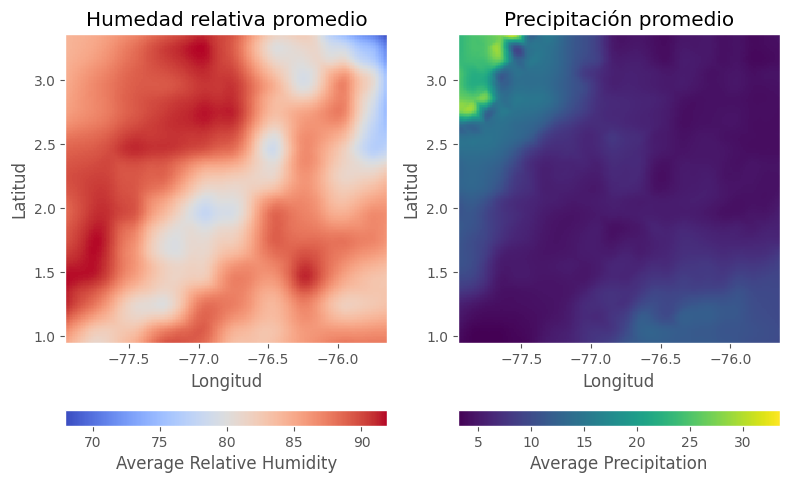

In [16]:
df_humedad_relativa_grouped = group_by_coordinates(df_humedad_relativa, 'relative_humidity')
df_precipitacion_grouped = group_by_coordinates(df_precipitacion, 'precipitation')
df_temp_max_grouped = group_by_coordinates(df_temp_max, 'air_temperature')
df_temp_min_grouped = group_by_coordinates(df_temp_min, 'air_temperature')

plot_geographic_variables_continuous(
    dataframes=[df_temp_max_grouped, df_temp_min_grouped],
    value_columns=['air_temperature', 'air_temperature'],
    titles=['Temperatura máxima promedio', 'Temperatura mínima promedio'],
    cmaps=['coolwarm', 'viridis']
)

plt.show()

plot_geographic_variables_continuous(
    dataframes=[df_humedad_relativa_grouped, df_precipitacion_grouped],
    value_columns=['relative_humidity', 'precipitation'],
    titles=['Humedad relativa promedio', 'Precipitación promedio'],
    cmaps=['coolwarm', 'viridis']
)

plt.show()

In [17]:
# import geopandas as gpd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Get location data
# df_location = df_entomologico[['county', 'decimalLatitude', 'decimalLongitude']]

# # Filter by county
# df_location_b1 = df_location[df_location['county'] == 'Patía']
# df_location_b2 = df_location[df_location['county'] == 'Miranda']
# df_location_b3 = df_location[df_location['county'] == 'Piamonte']

# # Create GeoDataFrames for each county
# gdf_patia = gpd.GeoDataFrame(df_location_b1, geometry=gpd.points_from_xy(df_location_b1.decimalLongitude, df_location_b1.decimalLatitude))
# gdf_miranda = gpd.GeoDataFrame(df_location_b2, geometry=gpd.points_from_xy(df_location_b2.decimalLongitude, df_location_b2.decimalLatitude))
# gdf_piamonte = gpd.GeoDataFrame(df_location_b3, geometry=gpd.points_from_xy(df_location_b3.decimalLongitude, df_location_b3.decimalLatitude))

# # Create first figure for Patía - wider ratio
# plt.figure(figsize=(24, 12))
# ax = gdf_patia.plot(marker='o', color='red', markersize=5, alpha=0.6)
# plt.title('Distribución en Patía', fontsize=14)
# plt.xlabel('Longitud')
# plt.ylabel('Latitud')
# plt.tight_layout()
# plt.show()

# # Create second figure for Miranda - wider ratio
# plt.figure(figsize=(16, 8))
# gdf_miranda.plot(marker='o', color='blue', markersize=5, alpha=0.6)
# plt.title('Distribución en Miranda', fontsize=14)
# plt.xlabel('Longitud')
# plt.ylabel('Latitud')
# plt.tight_layout()
# plt.show()

# # Create third figure for Piamonte - wider ratio
# plt.figure(figsize=(16, 8))
# gdf_piamonte.plot(marker='o', color='green', markersize=5, alpha=0.6)
# plt.title('Distribución en Piamonte', fontsize=14)
# plt.xlabel('Longitud')
# plt.ylabel('Latitud')
# plt.tight_layout()
# plt.show()